#Divide and Conquer

###What is Divide and Conquer?
Divide and Conquer is a recursive problem-solving approach which break a problem into smaller subproblems, recursively solve the subproblems, and finally combines the solutions to the subproblems to solve the original problem. In computer science, divide and conquer is an algorithm design paradigm based on multi-branched recursion. This method usually allows us to reduce the time complexity to a large extent

###Phases of Divide and Conquer
###It consists of three phases:
- **Divide**: Dividing the problem into two or more than two sub-problems that are similar to the original problem but smaller in size.
- **Conquer**: Solve the sub-problems recursively.
- **Combine**: Combine these solutions to subproblems to create a solution to the original problem.



###Divide and Conquer technique has certain applications which are given below
- **Merge Sort**
- **Quick Sort**
- **Karatsuba Multiplication**

#Merge Sort

In computer science, merge sort (also commonly spelled mergesort) is an efficient, general-purpose, comparison-based sorting algorithm. Most implementations produce a stable sort, which means that the order of equal elements is the same in the input and output. Merge sort is a divide and conquer algorithm that was invented by John von Neumann in 1945
Time complexity of Merge Sort is $ \Theta(nlog n)$



Following a visual representation of the divide and conquer applied for sorting numbers. This algorithm is known as merge sort:


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Merge_sort_algorithm_diagram.svg/2560px-Merge_sort_algorithm_diagram.svg.png" width="480">


Here's a step-by-step description for merge sort:

- If the input list is empty or contains just one element, it is already sorted. Return it.
- If not, divide the list of numbers into two roughly equal parts.
- Sort each part recursively using the merge sort algorithm. You'll get back two sorted lists.
- Merge the two sorted lists to get a single sorted list

In [13]:
# Main libraries
import math
import random
import copy
import timeit
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [7]:
# Efficiente merge function
def merge(u, v):
    t = []
    i, j = 0, 0
    m, n = len(u), len(v)
    u.append(math.inf)
    v.append(math.inf)
    
    for k in range(m + n):
        if u[i] < v[j]:
            t.append(u[i])
            i += 1
        else:
            t.append(v[j])
            j += 1
    
    return t

In [8]:
# Merge-sort recursive algorithm
def merge_sort(l):
    n = len(l)
    
    if n > 1:
        u = l[0 : n//2]
        v = l[n//2 : n]
        
        u = merge_sort(u)
        v = merge_sort(v)
        return merge(u, v)
    
    return l

In [9]:
# Test values
l = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 0]

# Run algorithm
merge_sort(l)

[0, 1, 1, 2, 3, 3, 4, 5, 5, 5, 6, 8, 9, 9]

#Quick Sort

Quicksort (sometimes called partition-exchange sort) is an efficient sorting algorithm. Developed by British computer scientist Tony Hoare in 1959 and published in 1961, it is still a commonly used algorithm for sorting

Quicksort is a divide-and-conquer algorithm. It works by selecting a 'pivot' element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the pivot. The sub-arrays are then sorted recursively. This can be done in-place, requiring small additional amounts of memory to perform the sorting.
Time complexity of Quick Sort is $ \Theta(nlog n)$

Here's a step-by-step description for quick sort:


- If the list is empty or has just one element, return it. It's already sorted.
- Pick a random element from the list. This element is called a _pivot_.
- Reorder the list so that all elements with values less than or equal to the pivot come before the pivot, while all elements with values greater than the pivot come after it. This operation is called _partitioning_.
- The pivot element divides the array into two parts which can be sorted independently by making a recursive call to quicksort.

![](https://images.deepai.org/glossary-terms/a5228ea07c794b468efd1b7f758b9ead/Quicksort.png)


In [10]:
def partition(array, i, j):
    pivot = array[i]
    k = i + 1
    l = j - 1
    
    while True:
        
        while k <= l and array[l] > pivot:
            l = l - 1
        
        while k <= l and array[k] <= pivot:
            k = k + 1
        
        if k <= l:
            array[k], array[l] = array[l], array[k]
        else:
            break

    array[i], array[l] = array[l], array[i]

    return l

In [11]:
# Quicksort recursive algorithm
def _quick_sort(array, i, j):
    
    if i < j:
        l = partition(array, i, j)
        _quick_sort(array, i, l)
        _quick_sort(array, l + 1, j)
    
    return array

# Quicksort algorithm
def quick_sort(array):
    return _quick_sort(array, 0, len(array))

In [12]:
# Test values
array = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5, 8, 9, 0]

# Run algorithm
quick_sort(array)

[0, 1, 1, 2, 3, 3, 4, 5, 5, 5, 6, 8, 9, 9]

#Comparing Various Sorting Algorithms to gauge the performance

In [14]:
# Experiment variables
n_list = [1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000]
n_max = n_list[len(n_list) -1]

In [15]:
# Creating a random value (uniform)
ms = datetime.now().microsecond / 1000
random.seed(ms)

numbers = []
for i in range(n_max):
    numbers.append(int(random.random() * 1000))

In [16]:
a_time = []
b_time = []
c_time = []

for l in n_list:
    a = copy.deepcopy(numbers[0:l])
    b = copy.deepcopy(numbers[0:l])
    c = copy.deepcopy(numbers[0:l])
    
    start_time = timeit.default_timer()
    quick_sort(a)
    a_time.append((timeit.default_timer() - start_time) * 1000)
    
    start_time = timeit.default_timer()
    merge_sort(b)
    b_time.append((timeit.default_timer() - start_time) * 1000)
    
    start_time = timeit.default_timer()
    c.sort()
    c_time.append((timeit.default_timer() - start_time) * 1000)

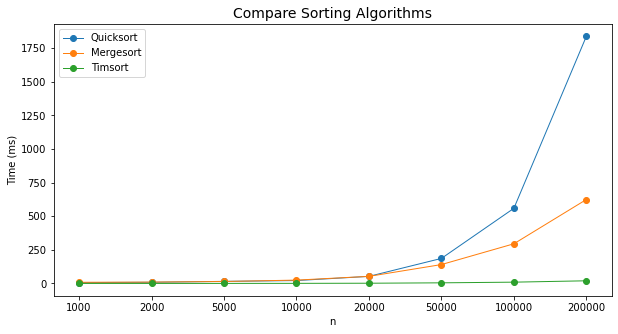

In [17]:
# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(a_time, linewidth = 1, marker="o")
plt.plot(b_time, linewidth = 1, marker="o")
plt.plot(c_time, linewidth = 1, marker="o")
plt.xticks(np.arange(len(n_list)), n_list)
plt.title("Compare Sorting Algorithms", fontsize = 14)
plt.ylabel('Time (ms)')
plt.xlabel('n')
plt.legend(("Quicksort", "Mergesort", "Timsort"), loc = "best")
plt.show()

**Karatsuba Multiplication**

The Karatsuba multiplication algorithm is named after the Russian mathematician Anatoly Karatsuba. It uses a divide and conquer approach that gives it a running time improvement over the standard multiplication method

The key to understanding Karatsuba’s multiplication algorithm is remembering that you can express x (an n-digit integer) in the following way:

$x = a*10^{{n}/{2}} + b$

You can use this if you want to multiply x by another n-digit integer y:

$y = c*10^{{n}/{2}} + d$

Then x multiplied by y can be written as:

$ x*y =(a*10^{{n}/{2}} + b)(c*10^{{n}/{2}} + d) $

This is where Karatsuba found a neat trick. He found a way to calculate ac, bd and (ad + bc) with just three multiplications (instead of four).

$ (a+b)(c+d) = ac + ad + bc + bd$

If you have already calculated ac, and bd then (ab + bc) can be calculated by subtracting ac and bd from (a+b)(c+d).
You can use Karatsuba’s trick recursively to compute the multiplication.

**Karatsuba Algorithm Explaination**

- Break the two integers x and y into a, b, c and d as described above
- Recursively compute ac
- Recursively compute bd
- Recursively compute (a + b)(c + d)
- Calculate (ab + bc) as (a + b)(c + d) – ac – bd
- Let A be ac with n zeros added to the end
- let B be (ab + bc) with half n zeros added to the end
- The final answer is A + B + bd

In [18]:
def zeroPad(numberString, zeros, left = True):
    """Return the string with zeros added to the left or right."""
    for i in range(zeros):
        if left:
            numberString = '0' + numberString
        else:
            numberString = numberString + '0'
    return numberString

def karatsubaMultiplication(x ,y):

    x = str(x)
    y = str(y)
    
    if len(x) == 1 and len(y) == 1:
        return int(x) * int(y)
    if len(x) < len(y):
        x = zeroPad(x, len(y) - len(x))
    elif len(y) < len(x):
        y = zeroPad(y, len(x) - len(y))
    n = len(x)
    j = n//2
    
    #for odd digit integers
    if (n % 2) != 0:
        j += 1    
    BZeroPadding = n - j
    AZeroPadding = BZeroPadding * 2
    a = int(x[:j])
    b = int(x[j:])
    c = int(y[:j])
    d = int(y[j:])
    
    #recursively calculate
    ac = karatsubaMultiplication(a, c)
    bd = karatsubaMultiplication(b, d)
    k = karatsubaMultiplication(a + b, c + d)
    A = int(zeroPad(str(ac), AZeroPadding, False))
    B = int(zeroPad(str(k - ac - bd), BZeroPadding, False))
    return A + B + bd

In [19]:
karatsubaMultiplication(99,99)

9801

#References
- https://afteracademy.com/blog/divide-and-conquer-approach-in-programming#
- http://web.stanford.edu/class/archive/cs/cs161/cs161.1182/schedule.html
- https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm
- https://github.com/bharath3794/Algorithms-Illuminated---Part-1/

##Submitted By -
###Tarun Balwani (001561792)